# Plot model granules

In [1]:
## import required packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import xarray as xr

First granule: 2014-01-15 <br>
Last granule: 2021-02-07

In [7]:
## look at example files

## start dates =======================
## u velocity
uvel_start = xr.open_dataset('/Users/mzahn/data/SASSIE/SASSIE_netcdfs/ocean_vel_day_mean/UVEL/UVEL_day_mean_2014-01-15_ECCO_SASSIE_V1_HH_llc1080.nc')
uvel_start.close()

## v velocity
vvel_start = xr.open_dataset('/Users/mzahn/data/SASSIE/SASSIE_netcdfs/ocean_vel_day_mean/VVEL/VVEL_day_mean_2014-01-15_ECCO_SASSIE_V1_HH_llc1080.nc')
vvel_start.close()

## salt
salt_start = xr.open_dataset('/Users/mzahn/data/SASSIE/SASSIE_netcdfs/ocean_state_3D_day_mean/SALT/SALT_day_mean_2014-01-15_ECCO_SASSIE_V1_HH_llc1080.nc')
salt_start.close()

## theta
theta_start = xr.open_dataset('/Users/mzahn/data/SASSIE/SASSIE_netcdfs/ocean_state_3D_day_mean/THETA/THETA_day_mean_2014-01-15_ECCO_SASSIE_V1_HH_llc1080.nc')
theta_start.close()

## end dates ==========================
## u velocity
uvel_end = xr.open_dataset('/Users/mzahn/data/SASSIE/SASSIE_netcdfs/ocean_vel_day_mean/UVEL/UVEL_day_mean_2021-02-07_ECCO_SASSIE_V1_HH_llc1080.nc')
uvel_end.close()

## v velocity
vvel_end = xr.open_dataset('/Users/mzahn/data/SASSIE/SASSIE_netcdfs/ocean_vel_day_mean/VVEL/VVEL_day_mean_2021-02-07_ECCO_SASSIE_V1_HH_llc1080.nc')
vvel_end.close()

## salt
salt_end = xr.open_dataset('/Users/mzahn/data/SASSIE/SASSIE_netcdfs/ocean_state_3D_day_mean/SALT/SALT_day_mean_2021-02-07_ECCO_SASSIE_V1_HH_llc1080.nc')
salt_end.close()

## theta
theta_end = xr.open_dataset('/Users/mzahn/data/SASSIE/SASSIE_netcdfs/ocean_state_3D_day_mean/THETA/THETA_day_mean_2021-02-07_ECCO_SASSIE_V1_HH_llc1080.nc')
theta_end.close()

In [9]:
theta_start

<xarray.Dataset>
Dimensions:    (time: 1, j: 1080, i: 1800, k: 90, j_g: 1080, i_g: 1800,
                k_u: 90, k_l: 90, k_p1: 91, nb: 4, nv: 2)
Coordinates: (12/20)
  * time       (time) datetime64[ns] 2014-01-15T12:00:00
  * j          (j) int32 0 1 2 3 4 5 6 7 ... 1073 1074 1075 1076 1077 1078 1079
  * i          (i) int32 0 1 2 3 4 5 6 7 ... 1793 1794 1795 1796 1797 1798 1799
  * k          (k) int32 0 1 2 3 4 5 6 7 8 9 ... 80 81 82 83 84 85 86 87 88 89
  * j_g        (j_g) int32 0 1 2 3 4 5 6 ... 1073 1074 1075 1076 1077 1078 1079
  * i_g        (i_g) int32 0 1 2 3 4 5 6 ... 1793 1794 1795 1796 1797 1798 1799
    ...         ...
    YC_bnds    (j, i, nb) float32 ...
    Z          (k) float32 ...
    Zu         (k_u) float32 ...
    Zl         (k_l) float32 ...
    Zp1        (k_p1) float32 ...
    time_bnds  (time, nv) datetime64[ns] ...
Dimensions without coordinates: nb, nv
Data variables:
    THETA      (time, k, j, i) float64 ...
Attributes: (12/55)
    acknowledgement:                 This research was carried out by the Jet...
    author:                          Mike Wood, Marie Zahn, and Ian Fenty
    cdm_data_type:                   Grid
    Conventions:                     CF-1.8, ACDD-1.3
    creator_email:                   ecco-group@mit.edu
    creator_institution:             NASA Jet Propulsion Laboratory (JPL)
    ...                              ...
    time_coverage_end:               2014-01-15T00:00:00
    time_coverage_start:             2014-01-16T00:00:00
    title:                           SASSIE Ocean Model THETA Parameter for t...
    uuid:                            9bd6a838-e7f7-11ee-ae5f-aa598f4e49fc
    comment:                         SASSIE llc1080 V1R1 fields are consolida...
    date_modified:                   2024-03-21T19:55:15

In [11]:
def plot_ecco_HH_granule_3D(granule_da, depth=0, vmin=None, vmax=None, axs=None, cmap='jet', show_colorbar=True):
    """
    Must input DataArray for variable you want to plot (not Dataset)
    For example: theta_da.THETA
    """
    
    ## make Z a coordinate dimension
    granule_da = granule_da.swap_dims({"k":"Z"})
    
    if vmin == None:
        vmin = np.min(granule_da)
    if vmax == None:
        vmax = np.max(granule_da)

    if axs == None:
        if show_colorbar:
            granule_da.sel(Z=depth, method='nearest').isel(time=0).plot(vmin=vmin, vmax=vmax, cmap=cmap)
        else:
            granule_da.sel(Z=depth, method='nearest').isel(time=0).plot(vmin=vmin, vmax=vmax, cmap=cmap, add_colorbar=False)

    else:
        if show_colorbar:
            granule_da.sel(Z=depth, method='nearest').isel(time=0).plot(vmin=vmin, vmax=vmax, cmap=cmap, ax=axs)
        else:
            granule_da.sel(Z=depth, method='nearest').isel(time=0).plot(ax=axs, vmin=vmin, vmax=vmax, cmap=cmap, add_colorbar=False)
        axs.set_facecolor('lightgray');
            
    fig.tight_layout(w_pad=3)

***

## Z=50 m

### UVEL

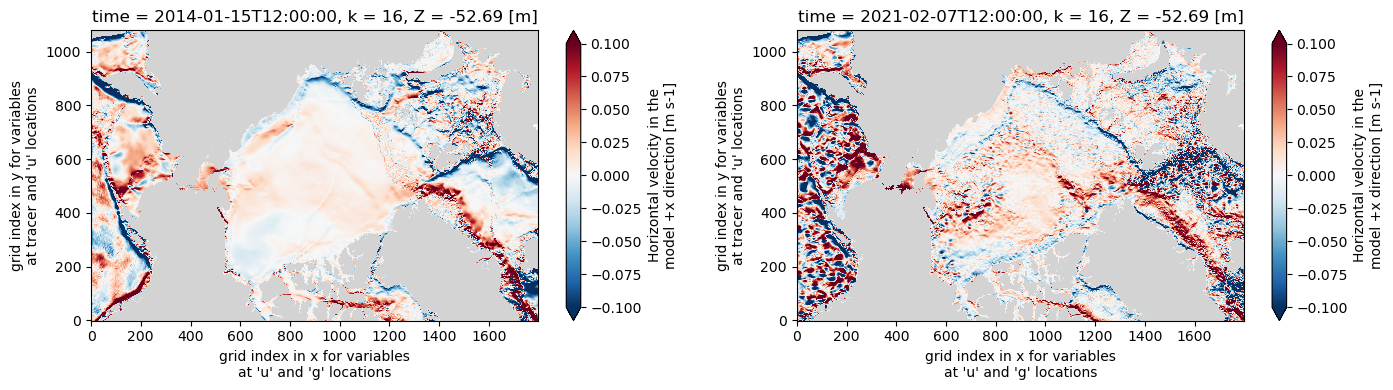

In [122]:
fig, (ax1,ax2) = plt.subplots(1,2, figsize=[14,4])
vmin=-0.1
vmax=0.1

plot_ecco_HH_granule_3D(uvel_start.UVEL, depth=-50, vmin=vmin, vmax=vmax, axs=ax1, cmap='RdBu_r', show_colorbar=True)
plot_ecco_HH_granule_3D(uvel_end.UVEL, depth=-50, vmin=vmin, vmax=vmax, axs=ax2, cmap='RdBu_r', show_colorbar=True)

### VVEL

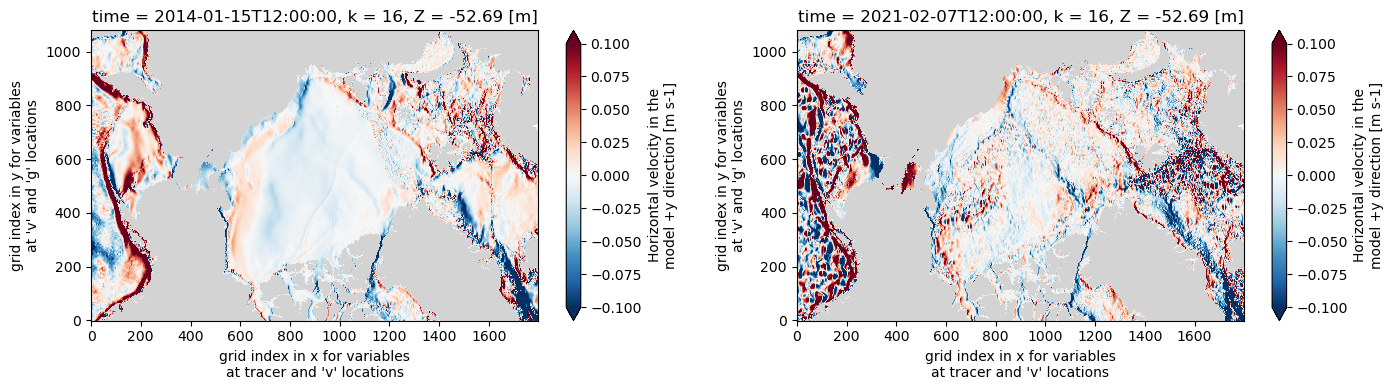

In [124]:
fig, (ax1,ax2) = plt.subplots(1,2, figsize=[14,4])
vmin=-0.1
vmax=0.1

plot_ecco_HH_granule_3D(vvel_start.VVEL, depth=-50, vmin=vmin, vmax=vmax, axs=ax1, cmap='RdBu_r', show_colorbar=True)
plot_ecco_HH_granule_3D(vvel_end.VVEL, depth=-50, vmin=vmin, vmax=vmax, axs=ax2, cmap='RdBu_r', show_colorbar=True)

### THETA

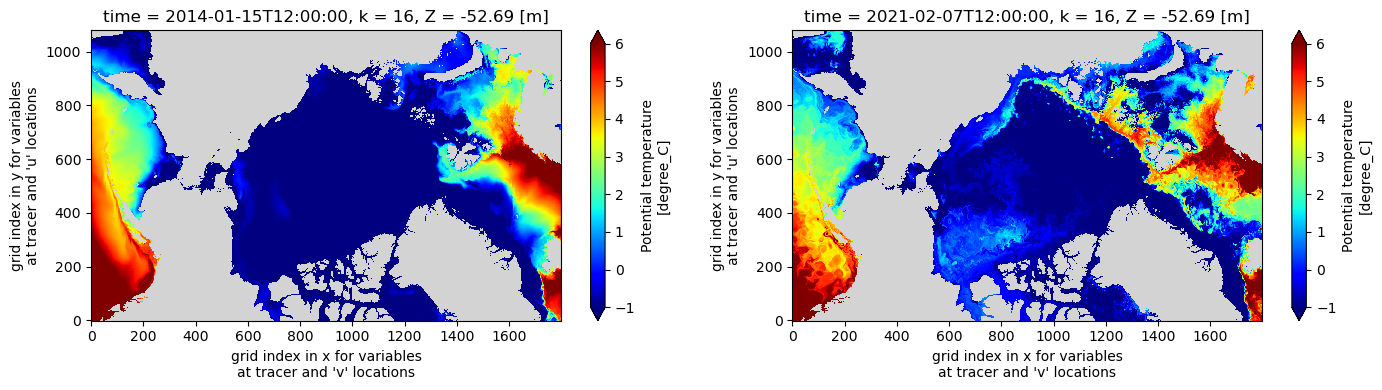

In [128]:
fig, (ax1,ax2) = plt.subplots(1,2, figsize=[14,4])
vmin=-1
vmax=6

plot_ecco_HH_granule_3D(theta_start.THETA, depth=-50, vmin=vmin, vmax=vmax, axs=ax1, cmap='jet', show_colorbar=True)
plot_ecco_HH_granule_3D(theta_end.THETA, depth=-50, vmin=vmin, vmax=vmax, axs=ax2, cmap='jet', show_colorbar=True)

### SALT

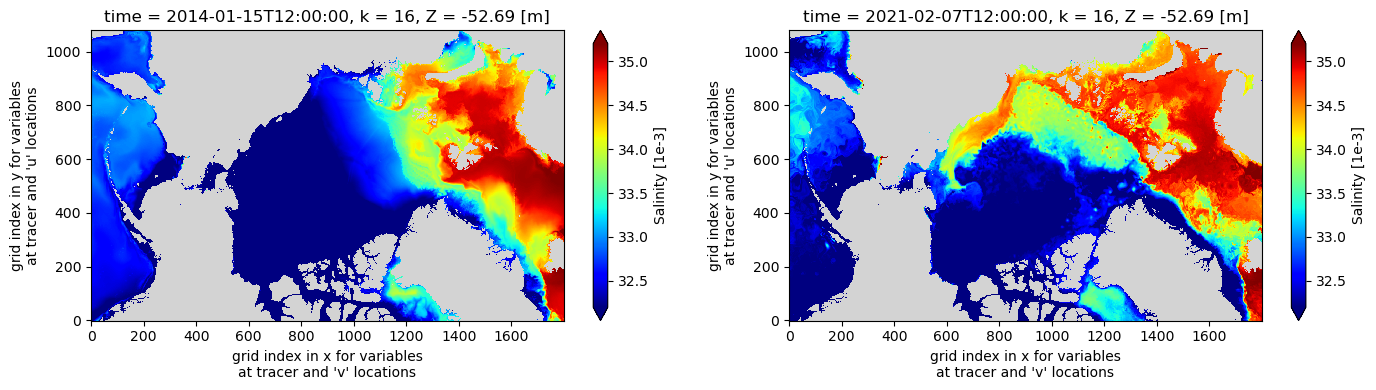

In [17]:
fig, (ax1,ax2) = plt.subplots(1,2, figsize=[14,4])
vmin=32.2
vmax=35.2

plot_ecco_HH_granule_3D(salt_start.SALT, depth=-50, vmin=vmin, vmax=vmax, axs=ax1, cmap='jet', show_colorbar=True)
plot_ecco_HH_granule_3D(salt_end.SALT, depth=-50, vmin=vmin, vmax=vmax, axs=ax2, cmap='jet', show_colorbar=True)

In [30]:
salt_end

<xarray.Dataset>
Dimensions:    (time: 1, j: 1080, i: 1800, k: 90, j_g: 1080, i_g: 1800,
                k_u: 90, k_l: 90, k_p1: 91, nb: 4, nv: 2)
Coordinates: (12/20)
  * time       (time) datetime64[ns] 2021-02-07T12:00:00
  * j          (j) int32 0 1 2 3 4 5 6 7 ... 1073 1074 1075 1076 1077 1078 1079
  * i          (i) int32 0 1 2 3 4 5 6 7 ... 1793 1794 1795 1796 1797 1798 1799
  * k          (k) int32 0 1 2 3 4 5 6 7 8 9 ... 80 81 82 83 84 85 86 87 88 89
  * j_g        (j_g) int32 0 1 2 3 4 5 6 ... 1073 1074 1075 1076 1077 1078 1079
  * i_g        (i_g) int32 0 1 2 3 4 5 6 ... 1793 1794 1795 1796 1797 1798 1799
    ...         ...
    YC_bnds    (j, i, nb) float32 ...
    Z          (k) float32 -0.5 -1.57 -2.79 ... -5.882e+03 -6.301e+03 -6.76e+03
    Zu         (k_u) float32 ...
    Zl         (k_l) float32 ...
    Zp1        (k_p1) float32 ...
    time_bnds  (time, nv) datetime64[ns] ...
Dimensions without coordinates: nb, nv
Data variables:
    SALT       (time, k, j, i) float64 ...
Attributes: (12/55)
    acknowledgement:                 This research was carried out by the Jet...
    author:                          Mike Wood, Marie Zahn, and Ian Fenty
    cdm_data_type:                   Grid
    Conventions:                     CF-1.8, ACDD-1.3
    creator_email:                   ecco-group@mit.edu
    creator_institution:             NASA Jet Propulsion Laboratory (JPL)
    ...                              ...
    time_coverage_end:               2021-02-07T00:00:00
    time_coverage_start:             2021-02-08T00:00:00
    title:                           SASSIE Ocean Model SALT Parameter for th...
    uuid:                            d6e41744-e7f7-11ee-ae5f-aa598f4e49fc
    comment:                         SASSIE llc1080 V1R1 fields are consolida...
    date_modified:                   2024-03-21T19:56:54

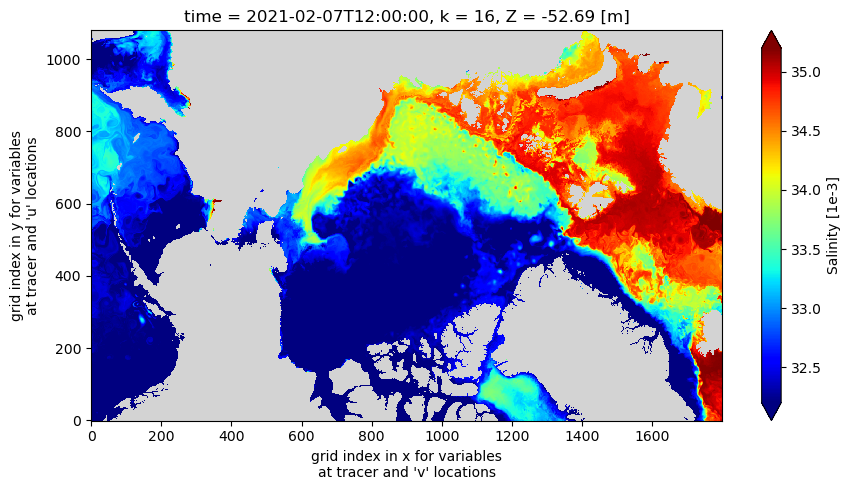

In [27]:
fig, (ax1) = plt.subplots(1,1, figsize=[9,5])
vmin=32.2
vmax=35.2

plot_ecco_HH_granule_3D(salt_end.SALT, depth=-50, vmin=vmin, vmax=vmax, axs=ax1, cmap='jet', show_colorbar=True)

***

## Z=150 m

### UVEL

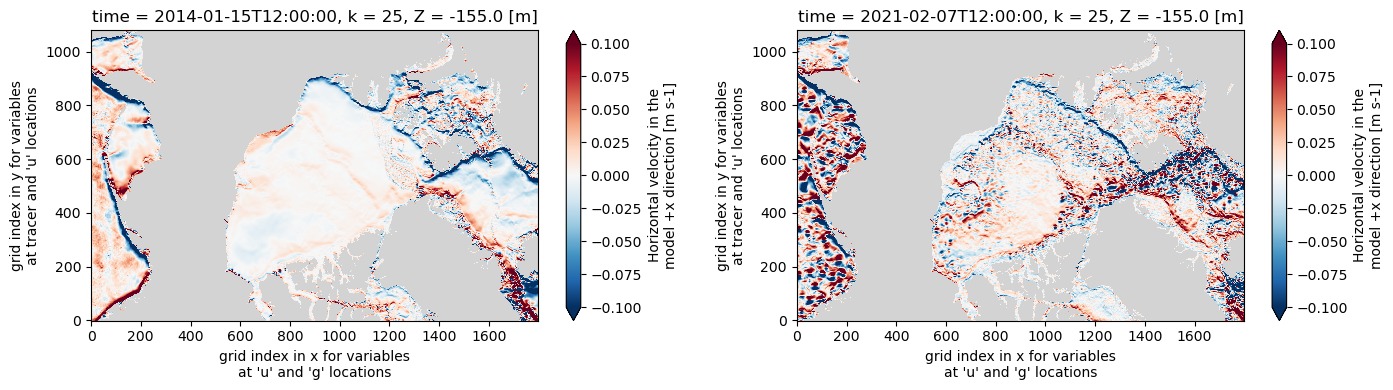

In [140]:
fig, (ax1,ax2) = plt.subplots(1,2, figsize=[14,4])
vmin=-0.1
vmax=0.1

plot_ecco_HH_granule_3D(uvel_start.UVEL, depth=-150, vmin=vmin, vmax=vmax, axs=ax1, cmap='RdBu_r', show_colorbar=True)
plot_ecco_HH_granule_3D(uvel_end.UVEL, depth=-150, vmin=vmin, vmax=vmax, axs=ax2, cmap='RdBu_r', show_colorbar=True)

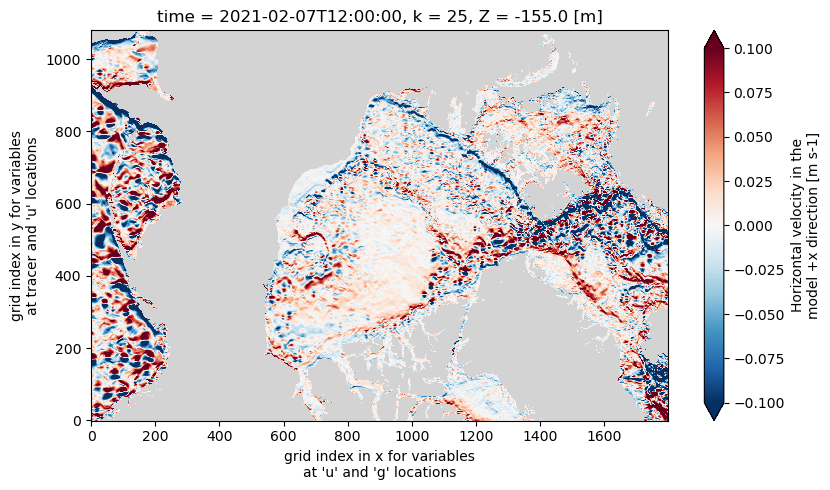

In [42]:
fig, (ax1) = plt.subplots(1,1, figsize=[8.5,5])
vmin=-0.1
vmax=0.1

plot_ecco_HH_granule_3D(uvel_end.UVEL, depth=-150, vmin=vmin, vmax=vmax, axs=ax1, cmap='RdBu_r', show_colorbar=True)

### VVEL

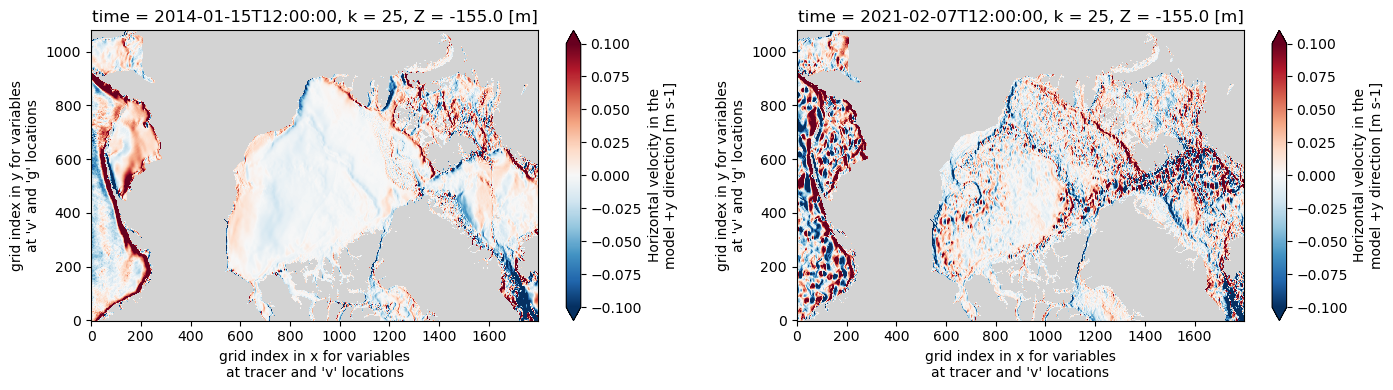

In [143]:
fig, (ax1,ax2) = plt.subplots(1,2, figsize=[14,4])
vmin=-0.1
vmax=0.1

plot_ecco_HH_granule_3D(vvel_start.VVEL, depth=-150, vmin=vmin, vmax=vmax, axs=ax1, cmap='RdBu_r', show_colorbar=True)
plot_ecco_HH_granule_3D(vvel_end.VVEL, depth=-150, vmin=vmin, vmax=vmax, axs=ax2, cmap='RdBu_r', show_colorbar=True)

### THETA

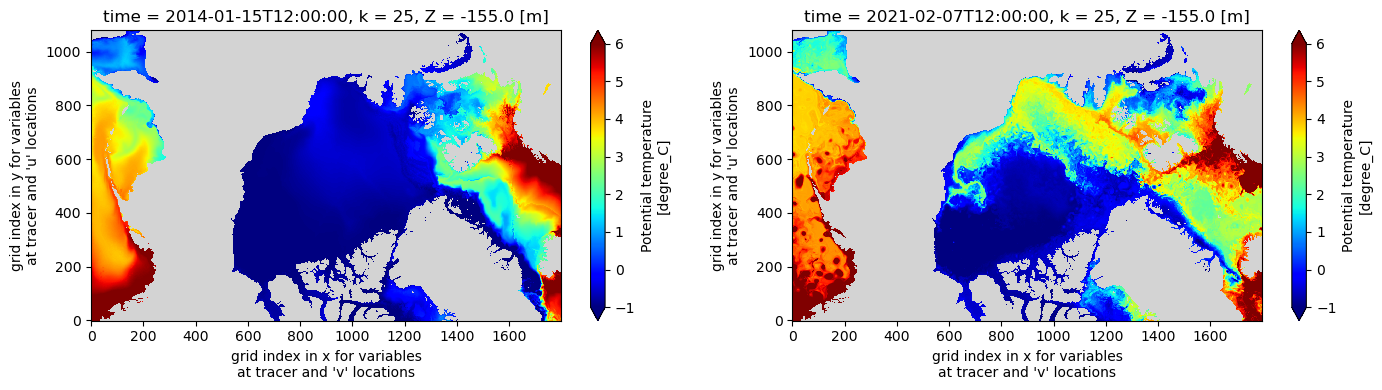

In [145]:
fig, (ax1,ax2) = plt.subplots(1,2, figsize=[14,4])
vmin=-1
vmax=6

plot_ecco_HH_granule_3D(theta_start.THETA, depth=-150, vmin=vmin, vmax=vmax, axs=ax1, cmap='jet', show_colorbar=True)
plot_ecco_HH_granule_3D(theta_end.THETA, depth=-150, vmin=vmin, vmax=vmax, axs=ax2, cmap='jet', show_colorbar=True)

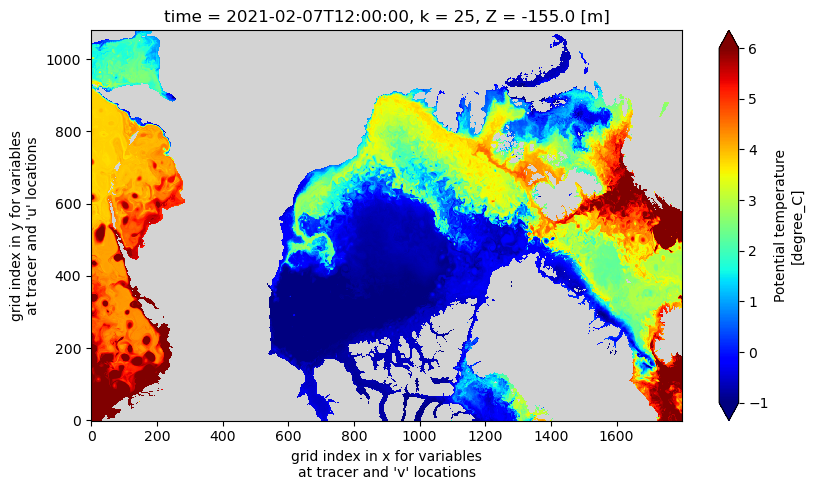

In [44]:
fig, (ax1) = plt.subplots(1,1, figsize=[8.5,5])
vmin=-1
vmax=6

plot_ecco_HH_granule_3D(theta_end.THETA, depth=-150, vmin=vmin, vmax=vmax, axs=ax1, cmap='jet', show_colorbar=True)

### SALT

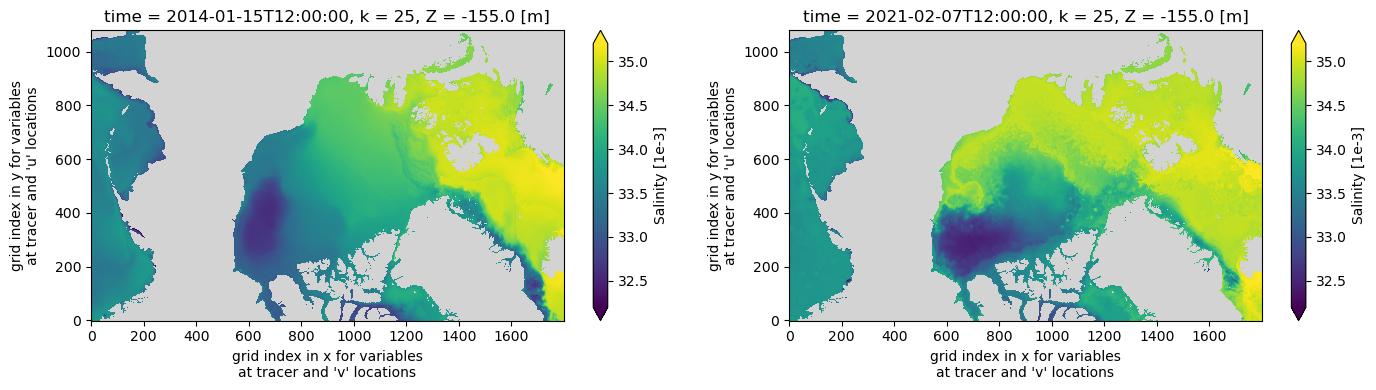

In [156]:
fig, (ax1,ax2) = plt.subplots(1,2, figsize=[14,4])
vmin=32.2
vmax=35.2

plot_ecco_HH_granule_3D(salt_start.SALT, depth=-150, vmin=vmin, vmax=vmax, axs=ax1, cmap='viridis', show_colorbar=True)
plot_ecco_HH_granule_3D(salt_end.SALT, depth=-150, vmin=vmin, vmax=vmax, axs=ax2, cmap='viridis', show_colorbar=True)